In [3]:
import pandas as pd
import time
from cellregmap import run_association_fast

In [1]:
input_file = '/directflow/SCCGGroupShare/projects/anncuo/OneK1K/saige_eqtl/cellregmap_comparison/RPL23A.cis.chr17.input.txt'

In [4]:
input_df = pd.read_csv(input_file, sep='\t')
input_df.head()

,individual,age,sex,pc1,pc2,pc3,pc4,pc5,pc6,pf1,...,G2010,G2011,G2012,G2013,G2014,G2015,G2016,G2017,G2018,G2019
0,1000_1001,73,2,0.010817,-0.004234,0.005379,-0.020582,-0.027539,-0.039861,-0.02207,...,1,1,1,1,1,1,0,1,1,1
1,1000_1001,73,2,0.010817,-0.004234,0.005379,-0.020582,-0.027539,-0.039861,-0.02207,...,1,1,1,1,1,1,0,1,1,1
2,1000_1001,73,2,0.010817,-0.004234,0.005379,-0.020582,-0.027539,-0.039861,-0.02207,...,1,1,1,1,1,1,0,1,1,1
3,1000_1001,73,2,0.010817,-0.004234,0.005379,-0.020582,-0.027539,-0.039861,-0.02207,...,1,1,1,1,1,1,0,1,1,1
4,1000_1001,73,2,0.010817,-0.004234,0.005379,-0.020582,-0.027539,-0.039861,-0.02207,...,1,1,1,1,1,1,0,1,1,1


In [28]:
input_df.shape

(82068, 2036)

In [59]:
y = input_df['E']
y

0        29
1        17
2        21
3        25
4        20
         ..
82063    15
82064    16
82065    21
82066    16
82067    29
Name: E, Length: 82068, dtype: int64

(array([8.7000e+01, 1.9990e+03, 1.1202e+04, 2.4596e+04, 2.5549e+04,
        1.3665e+04, 3.9950e+03, 8.3000e+02, 1.2800e+02, 1.7000e+01]),
 array([ 2. ,  6.9, 11.8, 16.7, 21.6, 26.5, 31.4, 36.3, 41.2, 46.1, 51. ]),
 <BarContainer object of 10 artists>)

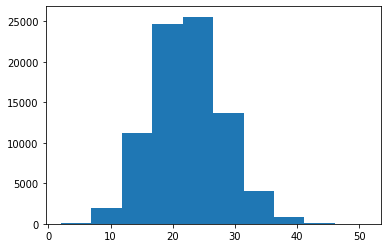

In [60]:
import matplotlib.pyplot as plt
plt.hist(y)

In [61]:
W = input_df[['age','sex','pc1','pc2','pc3','pc4','pc5','pc6']]
W

,age,sex,pc1,pc2,pc3,pc4,pc5,pc6
0,73,2,0.010817,-0.004234,0.005379,-0.020582,-0.027539,-0.039861
1,73,2,0.010817,-0.004234,0.005379,-0.020582,-0.027539,-0.039861
2,73,2,0.010817,-0.004234,0.005379,-0.020582,-0.027539,-0.039861
3,73,2,0.010817,-0.004234,0.005379,-0.020582,-0.027539,-0.039861
4,73,2,0.010817,-0.004234,0.005379,-0.020582,-0.027539,-0.039861
...,...,...,...,...,...,...,...,...
82063,32,2,-0.005781,-0.038025,-0.010168,-0.032019,-0.044955,0.006924
82064,32,2,-0.005781,-0.038025,-0.010168,-0.032019,-0.044955,0.006924
82065,32,2,-0.005781,-0.038025,-0.010168,-0.032019,-0.044955,0.006924
82066,32,2,-0.005781,-0.038025,-0.010168,-0.032019,-0.044955,0.006924


In [62]:
C = input_df[['pf1','pf2']]
C

,pf1,pf2
0,-0.022070,-0.005829
1,-0.022070,-0.005829
2,-0.022070,-0.005829
3,-0.022070,-0.005829
4,-0.022070,-0.005829
...,...,...
82063,-0.021218,0.052150
82064,-0.021218,0.052150
82065,-0.021218,0.052150
82066,-0.021218,0.052150


In [63]:
input_df.columns[17:input_df.shape[1]]

Index(['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10',
       ...
       'G2011', 'G2012', 'G2013', 'G2014', 'G2015', 'G2016', 'G2017', 'G2018',
       'G2019', 'cell'],
      dtype='object', length=2020)

In [64]:
G = input_df.values[:,17:input_df.shape[1]]
G.shape

(82068, 2020)

In [65]:
input_df['cell'] = input_df.index

In [66]:
smf_df = input_df[['individual','cell']]
smf_df.head()

,individual,cell
0,1000_1001,0
1,1000_1001,1
2,1000_1001,2
3,1000_1001,3
4,1000_1001,4


In [67]:
def get_groups_from_smf(smf_df):
    n_samples = smf_df.shape[0]
    donors = smf_df['individual'].unique()
    n_donors = len(donors)
    n_cells = array([],dtype=int)
    for donor in donors:
        n_cells = append(n_cells, array(smf_df[smf_df['individual']==donor].shape[0], dtype=int))
    groups = split(range(n_samples), cumsum(n_cells))[:-1]
    return groups

In [68]:
def get_block_hK_from_groups(groups):
    n_samples = len(list(itertools.chain.from_iterable(groups)))
    hM = zeros((n_samples, len(groups)))
    for i, idx in enumerate(groups):
        hM[idx, i] = 1.0
    return hM

In [69]:
from numpy import array, split, cumsum, zeros, append
import itertools

In [70]:
# indices for each group of cells (group=individual)
groups = get_groups_from_smf(smf_df)
# groups

In [71]:
hK = get_block_hK_from_groups(groups)

In [72]:
start_time = time.time()
pvals = run_association_fast(y=y, W=W.values, E=C.values, G=G, hK=hK)[0]
print("--- %s seconds ---" % (time.time() - start_time))

--- 298.99731063842773 seconds ---


(array([746., 200., 218., 120.,  88., 105., 140., 142., 189.,  72.]),
 array([1.46053338e-31, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

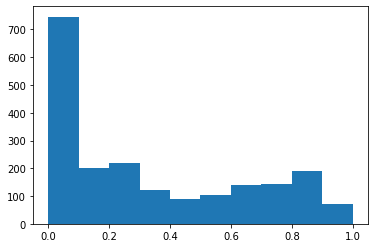

In [73]:
plt.hist(pvals)